## Detail - Linear Regression

In [ ]:
# 전지구 기후 전망, 한반도 기후 전망, 남한 상세 기후 전망 (시계열 조회, 분석)
http://www.climate.go.kr/home/CCS/contents/info/how_use.html

## 1.최소 제곱법(Least Square)
- OLS(Ordinary Least Equare) : 오차(잔차)의 제곱의 합이 최소가 되는 계수 계산
   - RSS(Residual Sum of Square)
   - 실제 값과 가설에 의한 예측 값의 차이가 가장 작은 계수 계산

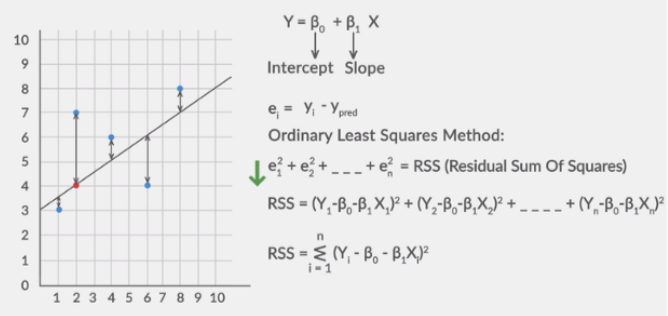

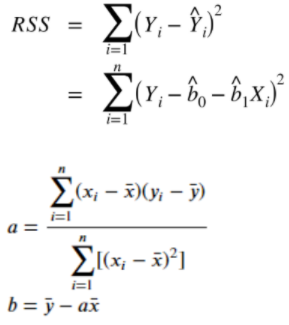

### 1-01. 식을 사용하여 직접 구해보자

a:6.6, b:22.900000000000006


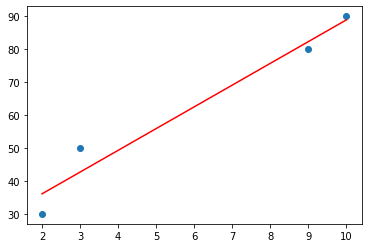

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([10,9,3,2]) 
y = np.array([90,80,50,30])

plt.plot(X, y, 'o')

a = np.sum((X-X.mean()) * (y-y.mean())) /  np.sum( (X-X.mean())**2 )
b = y.mean() - a*X.mean()
print(f"a:{a}, b:{b}")

plt.plot(X, X*a+b, 'r-' )

[6.6] 22.899999999999977


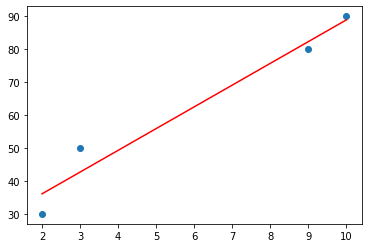

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.reshape(-1,1), y)
print(lr.coef_, lr.intercept_)
plt.plot(X, y, 'o')
plt.plot(X, X*lr.coef_[0]+lr.intercept_, 'r-' )

### 1-02. Linear Regression의 OLS 전개

In [ ]:
# 5개의 점을 표현하는 '오차'가 가장 적은 선을 하나 그리려고 합니다.

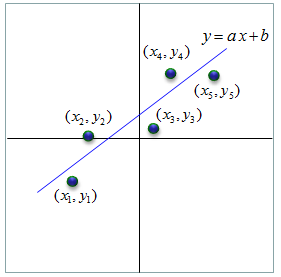

In [ ]:
선을 하나 가정하고, 그 선까지의 거리를 오차/오류(e)라고 합니다
y = ax + b 이므로 (x1, y1)점에 대해 y1 = a*x1 + b 로 표현할 수 있습니다
선 상의 좌표는 (x1, a*x1 + b)가 되고, 실제 좌표는 (x1, y1) 이므로 
x는 같으므로 y에 대한 차를 구하면 두 좌표의 차이(e1)를 구하면 e1 = (a*x1 + b) - y1 이 됩니다

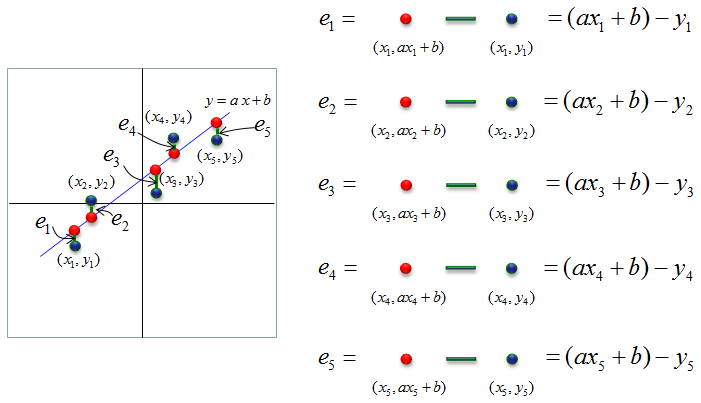

In [ ]:
우리의 목표는  e1~ e5 의 오류의 제곱합(RSS, Residual Sum of Square)을 최소로 하는 a, b 값을 찾는 것입니다

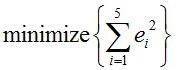

In [ ]:
그냥 e1 ~ e5의 합을 구하게 되면 양수와 음수의 상쇄에 의해 큰 오류가 있는 경우에도 오류가 없는 것 처럼 보일 수 있습니다.
때문에 오류의 제곱합을 사용합니다.  
e1 = 100
e2 = -100
e1 + e2 = 0

In [ ]:
다음과 같이 식이 전개됩니다.

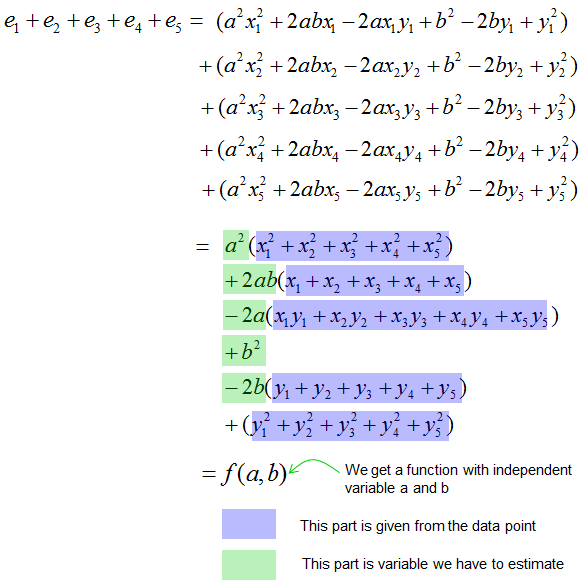

In [ ]:
a, b 두 변수를 갖는 2차 방정식을 그림으로 나타내면 다음과 같습니다.

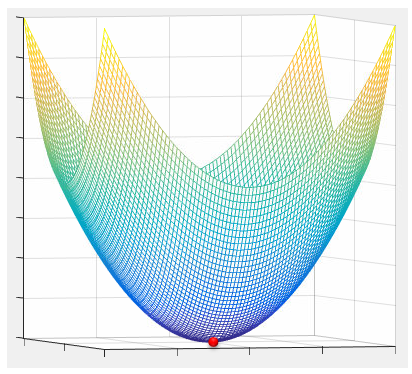

In [ ]:
그림에서 가장 하단의 지점을 찾는 것인데, 이를 위해 미분 개념을 사용합니다.
기울기가 0이 되는 곳이 그림에서 가장 하단의 지점이 됩니다.

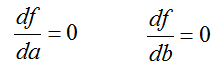

In [ ]:
회귀 방정식 (y = ax + b)을 Matrix Equation으로 변환하면 B와 같습니다.
# http://www.sharetechnote.com/html/EngMath_Matrix_SystemEq.html  

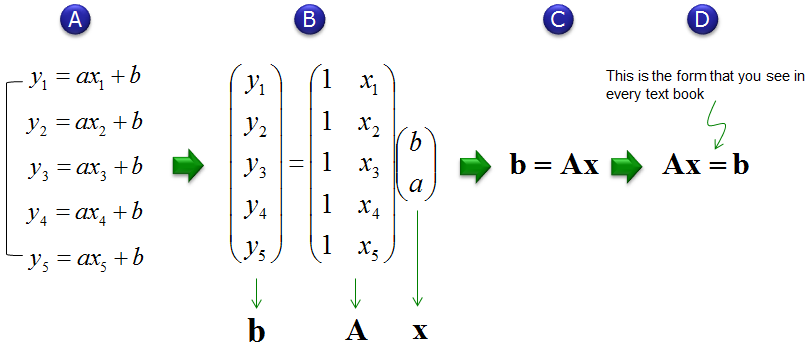

In [ ]:
Matrix Equation의 양쪽에 A의 transpose를 곱하고, x에 대해 식을 정리하면 다음과 같습니다.

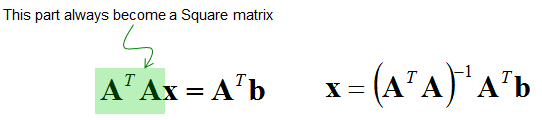

In [ ]:
a, b를 x라고 했으므로, x는 오류를 최소화한 값이 됩니다. # 오류 : 주어진 데이터와 회귀선의 해당 지점 사이의 오차 

- 출처 : ```http://www.sharetechnote.com/html/Handbook_EngMath_LeastSquare.html```

## 2.경사하강법

In [ ]:
#### 샘플 데이타 생성
* 단순화 하기 위해서 계수 1개만으로 제한
* m개의 샘플 데이타를 만든다.
* X 데이타 : np.arange(m) 
    * 0 ~ m
* y 데이타 : X * 2
    * 데이타가 너무 정직해서 약간의 노이즈를 추가

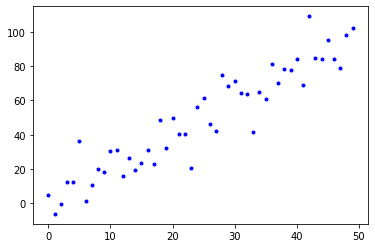

In [4]:
import random
import numpy as np
import matplotlib.pylab as plt

m = 50 #sample count
X = np.arange(m)
y = X  * 2 # W = 2, b=0(bias 생략) 
y = y + 10 * np.random.randn(m) # adding noise

plt.plot(X, y, 'b.')

In [ ]:
#### 선형 회귀 표시
* 데이타의 선회 회귀를 직선으로 표시
* 최종적으로 이 선을 만족하는 W를 찾으면 성공

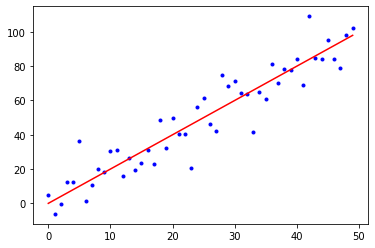

In [5]:
plt.plot(X, y, 'b.')
plt.plot(X, X*2, 'r')

### 2-01. Hypothesis와 Cost 함수

In [ ]:
# LinearRegression에 대한 cost 함수

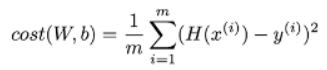

In [ ]:
# Logistic Regression에 대한 cost 함수

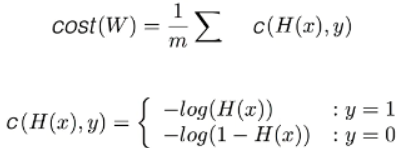

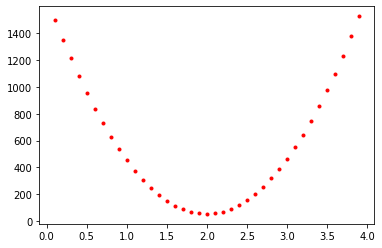

In [12]:
w_range = np.arange(0.1, 4, 0.1) 
costs = np.array([])
for i, w in enumerate(w_range):
    h = w*X
    cost = 1/(m) * np.sum( (h - y)**2)
    costs = np.append(costs, cost)
    #plt.plot(w, cost, 'r.')
plt.plot(w_range, costs, 'r.')

### 2-02. Cost 함수와 Gradient

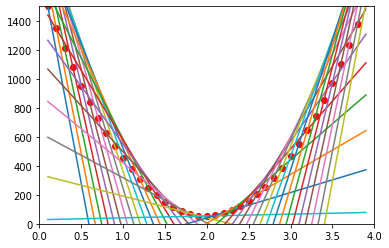

In [16]:
import time
plt.plot(w_range, costs, 'ro')
for w, cost in zip(w_range, costs):
    h = w*X
    gradient =  2/m * np.sum( (h-y) * X)
    plt.plot(w_range, gradient*(w_range-w) +cost) 
    plt.axis([0, 4, 0, 1500])


### 2-03. Batch Gradient Descent
- 전체 샘플에 대해 경사 하강법을 이용해서 예측

initial W 0.5253556889765272
epoch: 0  cost: 1846.9694691970828  gradient: -2371.7091290422068  W: 0.6439411454286376
epoch: 20  cost: 167.31740673018896  gradient: -439.32837691663923  W: 1.7423627708561054
epoch: 40  cost: 109.68390746321275  gradient: -81.37988777829297  W: 1.9458311405478252
epoch: 60  cost: 107.70634299496325  gradient: -15.074569462796244  W: 1.9835210189211638
epoch: 80  cost: 107.63848729860916  gradient: -2.7923686145617284  W: 1.9905025803989962
epoch: 100  cost: 107.63615898233853  gradient: -0.5172500945271338  W: 1.9917958241761697
epoch: 120  cost: 107.63607909137951  gradient: -0.09581387603780968  W: 1.9920353808244224
epoch: 140  cost: 107.63607635010015  gradient: -0.017748278711541162  W: 1.9920797555886665
epoch: 160  cost: 107.63607625603929  gradient: -0.003287638599369984  W: 1.9920879754386103
epoch: 180  cost: 107.63607625281182  gradient: -0.0006089924405614511  W: 1.992089498059276
suspended: 200
Final W: 1.9920897744646227


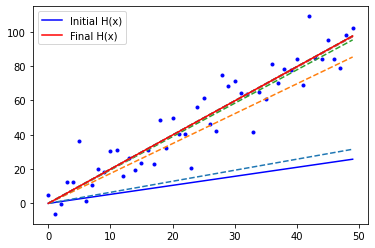

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(X, y, 'b.')

W = np.random.rand()
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W)

learning_rate = 0.00005
suspend = 0.00001
old_g = None
epochs = 1000
for epoch in range(epochs):
    hypothesis = W * X 
    loss = hypothesis - y
    cost = 1/(2*m) * np.sum(loss**2)
    gradient =  2/m * np.sum(loss * X)
    if old_g is not None and abs(gradient - old_g) < suspend:
        print('suspended:', epoch)
        break
    old_g = gradient
    W = W - learning_rate * gradient
    if epoch % 20 == 0:
        print('epoch:',epoch,' cost:',cost,' gradient:',gradient, ' W:', W)
        plt.plot(X, W*X, '--')
print('Final W:', W)
plt.plot(X, W*X, 'r', label='Final H(x)')
plt.legend()


### 2-04. Stochastic Gradient Descent
- Gradient Descent를 전체 데이터(Batch)가 아닌 일부 데이터의 모음(Mini-Batch)를 사용하는 방법
- Batch를 사용하면 step 계산에 전체 데이터를 사용하므로 계산량이 많음
- Mini-Batch를 사용하면 계산 속도가 훨씸 빠르기 때문에 같은 시간에 더 많은 Step를 나아갈 수 있음
- Local Minima에 빠지지 않고 Global Minima에 수렴할 가능성이 더 높음

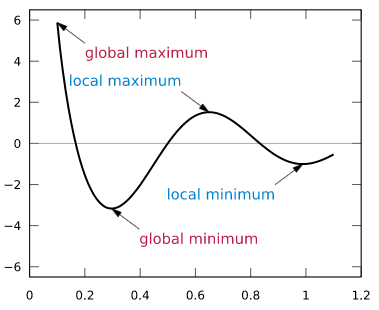
- 출처 : ```By KSmrq - http://commons.wikimedia.org/wiki/File:Extrema_example.svg, GFDL 1.2, https://commons.wikimedia.org/w/index.php?curid=6870865```

initial W 0.9911456786314672
epoch: 0 cost: 6.940999204798141e+22  gradient: 21919939072747.137  W: -212866344651.09067 learn_rate: 0.01
epoch: 5 cost: 6.427572917469178e+73  gradient: 4.477023942959864e+38  W: -2.7249202936563052e+35 learn_rate: 0.00125
epoch: 10 cost: 1.8869630421252013e+59  gradient: -2.810082372224263e+31  W: 5.303934229610822e+27 learn_rate: 0.0006666666666666666
epoch: 15 cost: 6.095903131919904e+23  gradient: 57208115451089.266  W: -4692365843.090324 learn_rate: 0.00045454545454545455
epoch: 20 cost: 94.04926184613822  gradient: -248.03509271967837  W: 1.9495371225996276 learn_rate: 0.0003448275862068965
epoch: 25 cost: 98.87511094057726  gradient: 324.8660331103572  W: 1.9100815061291936 learn_rate: 0.0002777777777777778
epoch: 30 cost: 109.9598376519261  gradient: -217.85557963801782  W: 1.945175181417955 learn_rate: 0.00023255813953488373
epoch: 35 cost: 227.2284838866037  gradient: 388.8726964850646  W: 2.0200240950525807 learn_rate: 0.0002
epoch: 40 cost: 3

(0.0, 50.0, 0.0, 100.0)

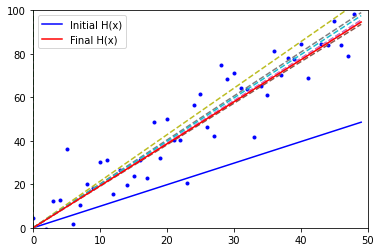

In [9]:
plt.plot(X, y, 'b.')

W = np.random.rand()
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W)

t0, t1 = 1, 100
epochs = 50
batches = 5
for epoch in range(epochs):
    for i in range(int(m/batches)):
        random_i = np.random.randint(0,m, (batches,))
        xi = X[random_i]
        yi = y[random_i]
        h = W*xi
        cost     = 1/batches* np.sum((h-yi)**2)
        gradient = 2/batches* np.sum((h-yi) * xi)
        learning_rate = t0/(t1 + (epoch * (m + i*10)))
        #learning_rate = 0.0005
        W = W - learning_rate * gradient
    if epoch %5 ==0:
        print('epoch:',epoch, 'cost:', cost,' gradient:',gradient, ' W:', W, 'learn_rate:', learning_rate)
        plt.plot(X, W*X, '--')
print('Final W:', W)
plt.plot(X, W*X, 'r', label='Final H(x)')
plt.legend()
plt.axis([0, 50, 0, 100])

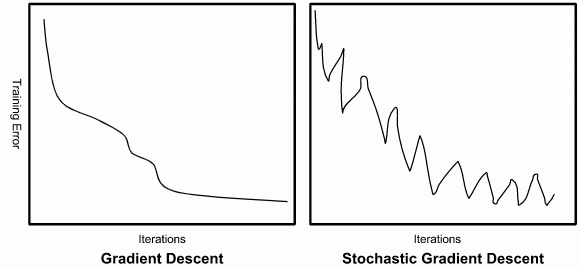